In [1]:
import numpy as np
import pandas as pd 

In [2]:
train = pd.read_csv('../input/train_file.csv')
test = pd.read_csv('../input/test_file.csv')

In [3]:
train.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [4]:
train.isna().sum()

Patient_ID                     0
YEAR                           0
LocationDesc                   0
Subtopic                       0
Greater_Risk_Question          0
Description                    0
Sample_Size                    0
Sex                            0
Race                           0
Grade                          0
GeoLocation                 3301
QuestionCode                   0
StratID1                       0
StratID2                       0
StratID3                       0
StratificationType             0
Greater_Risk_Probability       0
dtype: int64

In [5]:
train.dtypes

Patient_ID                    int64
YEAR                          int64
LocationDesc                 object
Subtopic                      int64
Greater_Risk_Question        object
Description                  object
Sample_Size                 float64
Sex                          object
Race                         object
Grade                         int64
GeoLocation                  object
QuestionCode                 object
StratID1                      int64
StratID2                      int64
StratID3                      int64
StratificationType           object
Greater_Risk_Probability    float64
dtype: object

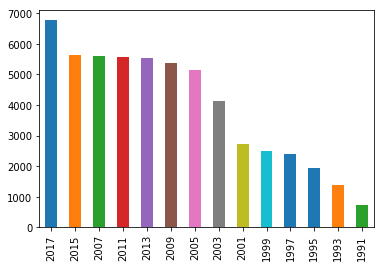

In [6]:
train['YEAR'].value_counts().plot.bar()

Number of asked questions is higher in recent years

In [7]:
train['LocationDesc'].value_counts()

United States                       2276
New York City, NY                   1396
New York                            1366
Miami-Dade County, FL               1145
San Diego, CA                       1043
Massachusetts                       1006
Maryland                            1005
Delaware                             958
Montana                              951
Michigan                             939
Florida                              938
Illinois                             902
Broward County, FL                   893
Hawaii                               889
North Carolina                       840
Nevada                               839
Chicago, IL                          837
Palm Beach County, FL                834
Alabama                              832
Texas                                830
Utah                                 824
South Carolina                       823
Philadelphia, PA                     779
Mississippi                          747
Arkansas        

We can see that survey is perfomed on quite a large scale 

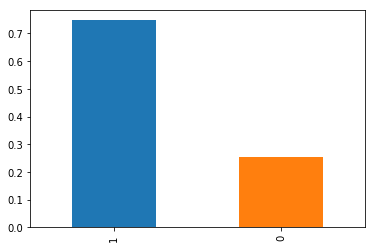

In [8]:
train['Subtopic'].value_counts(normalize = True).plot.bar()

Maximum number of questions asked in the survey was about the non-alcoholic drugs, one inference we can draw out of this is that people taking non-alcoholic drugs are more prone to addiction

Let's check the distribution of sample size

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


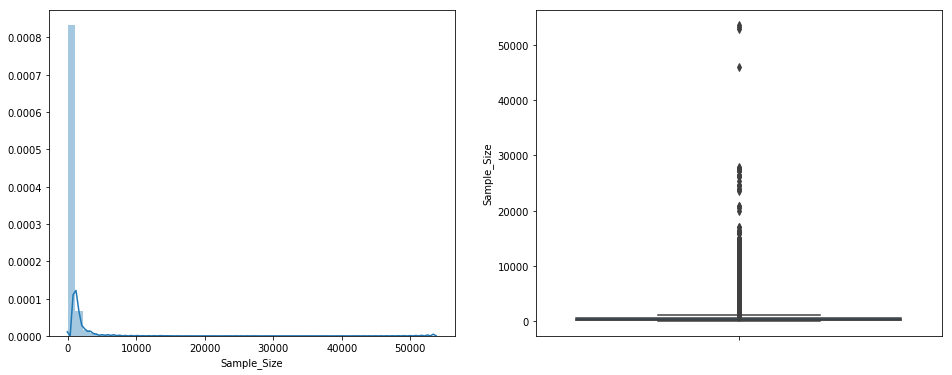

In [10]:
plt.figure(1,figsize=(16,6))

plt.subplot(121)
sns.distplot(train['Sample_Size'])

plt.subplot(122)
sns.boxplot(y=train['Sample_Size'])

plt.show()

We can see the significant number of outliers are present in our dataset for this column. Hence, transdormation will be required

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


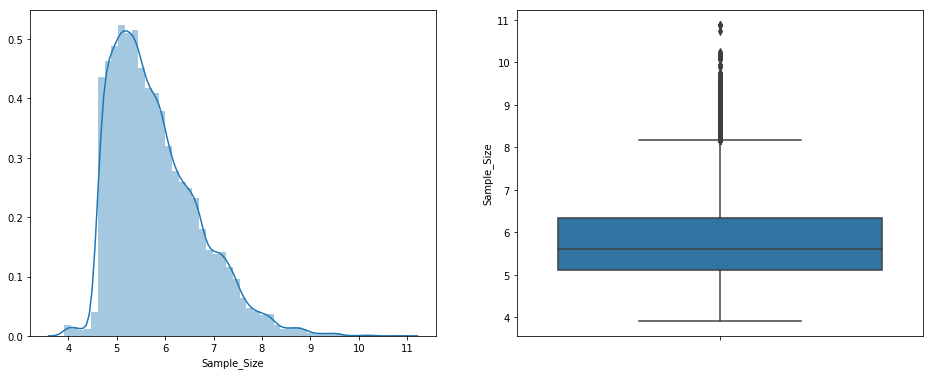

In [11]:
plt.figure(1,figsize=(16,6))

plt.subplot(121)

sns.distplot(np.log(train['Sample_Size']))

plt.subplot(122)
sns.boxplot(y=np.log(train['Sample_Size']))

plt.show()

Now its better

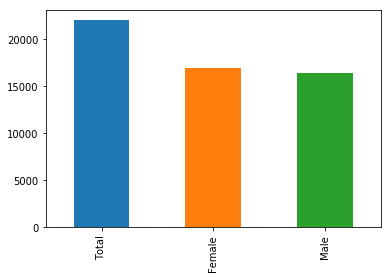

In [12]:
train.Sex.value_counts().plot.bar()

??? what is a total gender ??? 

Let's dig a bit

In [13]:
train.loc[train['Sex']=='Total'].head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
8,9,2017,West Virginia,1,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,427.0,Total,Total,1,"(38.66551020200046, -80.71264013499967)",H58,0,0,3,State,30.7151
9,10,1999,Hawaii,1,Ever used inhalants,"sniffed glue, breathed the contents of aerosol...",314.0,Total,Total,1,"(21.304850435000446, -157.85774940299973)",H50,0,0,3,State,18.3384
12,13,2007,Montana,1,Ever used marijuana,"also called grass, pot, or weed, one or more t...",776.0,Total,White,0,"(47.06652897200047, -109.42442064499971)",H46,0,6,2,State,37.3227
14,15,2011,Montana,0,Had their first drink of alcohol before age 13...,other than a few sips,887.0,Total,White,3,"(47.06652897200047, -109.42442064499971)",H41,0,6,1,State,29.7139


We can see columns 'Race' and 'Sex' is having values as 'Total', it could be because some people might not be wanting to share their details

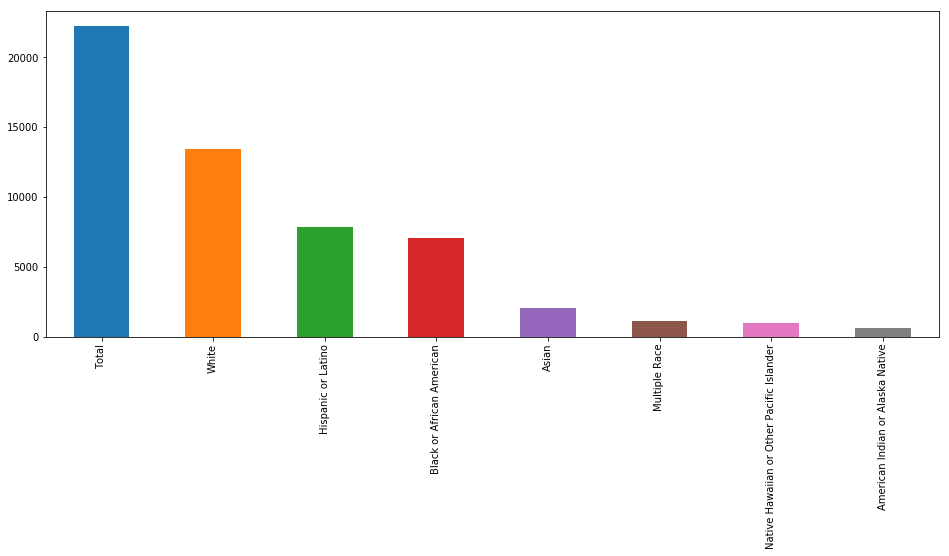

In [14]:
train['Race'].value_counts().plot.bar(figsize = (16,6))

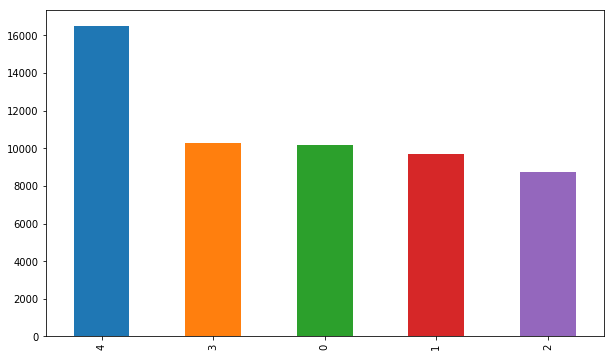

In [15]:
train['Grade'].value_counts().plot.bar(figsize = (10,6))

Most people who were surveyed have comlpeted education upto grade 4

One inference we can draw from the nature of the dataset is statergy adopted to prevent the addiction will certainly affect 'Greater_Risk_Probability'

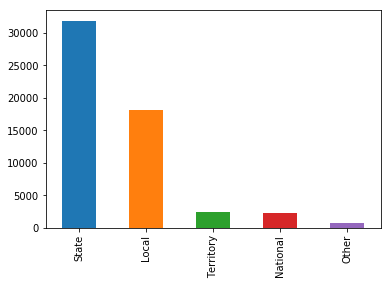

In [16]:
train['StratificationType'].value_counts().plot.bar()

Lets check year wise of average of Greater_Risk_Probability

In [17]:
def make_plot(df,col_name,figsize=(16,6)):
    
    plt.figure(1,figsize=figsize)
    dic = {}
    for val in df[col_name].value_counts().keys():
        dic[val] = np.mean(df['Greater_Risk_Probability'].loc[df[col_name]==val])
    
    plt.bar(range(len(dic)),dic.values(),align='center')
    plt.xticks(range(len(dic)),dic.keys())
    plt.show()

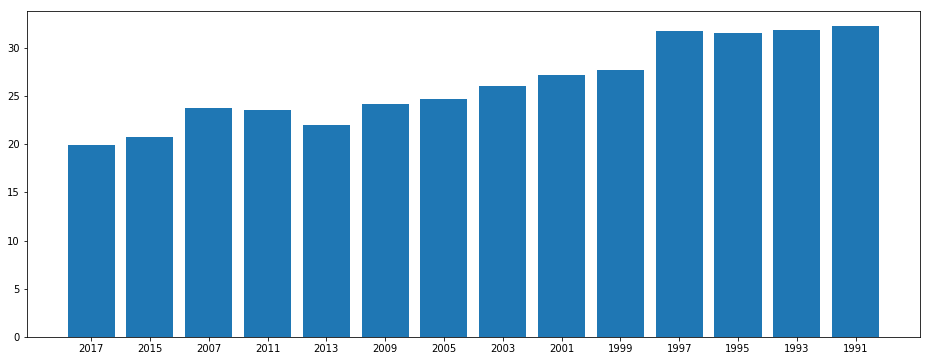

In [18]:
make_plot(train,'YEAR')

We can see that average of 'Greater_Risk_Probability' has decreased with years

Let's check Location-wise average of 'Greater_Risk_Probability'

In [19]:
dic = {}
for val in train['LocationDesc'].value_counts().keys():
    dic[val] = np.mean(train['Greater_Risk_Probability'].loc[train['LocationDesc']==val])

dic = sorted(dic.items(),key=lambda x: x[1])[::-1]

dic

[('Denver, CO', 38.35428749999999),
 ('Cleveland, OH', 35.716513157894745),
 ('Nevada', 30.268763408820032),
 ('Dallas, TX', 30.11029389534881),
 ('Seattle, WA', 29.49014332129963),
 ('Georgia', 28.742628571428586),
 ('Missouri', 28.582359701492532),
 ('Ohio', 28.534950214592264),
 ('Milwaukee, WI', 28.335305999999992),
 ('Palau', 28.227484883720933),
 ('West Virginia', 28.211860694444436),
 ('Alabama', 27.99212584134618),
 ('New Orleans, LA', 27.860129078014207),
 ('Chicago, IL', 27.818678853046578),
 ('Rhode Island', 27.640277743902455),
 ('Los Angeles, CA', 27.504902529761893),
 ('Nez Perce', 27.45151224489796),
 ('Guam', 27.262356775700972),
 ('South Carolina', 27.11523402187119),
 ('Massachusetts', 26.978234592445325),
 ('Wisconsin', 26.961921880064818),
 ('Arkansas', 26.928004838709683),
 ('South Dakota', 26.92770750382844),
 ('Arizona', 26.84467469325155),
 ('San Diego, CA', 26.519184947267508),
 ('Navajo', 26.515714750957862),
 ('San Bernardino, CA', 26.46442804597699),
 ('Wyom

One inference we can draw from above is  different locations have "greater_risk_probabilty". This  feature might be useful for our model

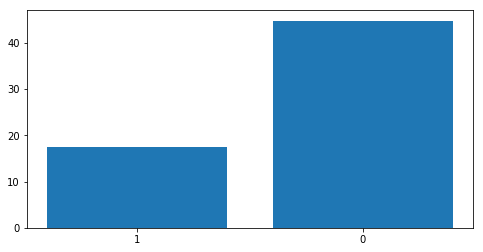

In [20]:
make_plot(train,col_name='Subtopic',figsize=(8,4))

**Intresting!!** People addicted to alchols have higher average probability of staying addicted, this could be because alchols are legal commodity and is easily available

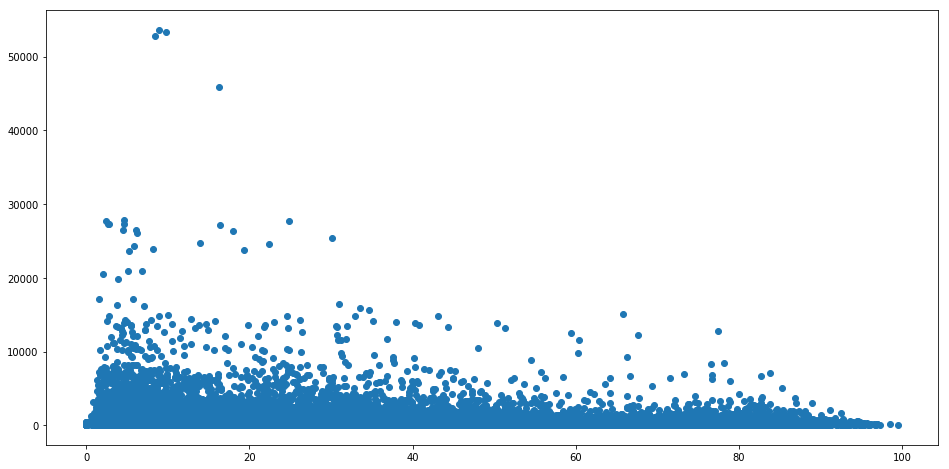

In [21]:
plt.figure(1,(16,8))
plt.scatter(x=train['Greater_Risk_Probability'],y=train['Sample_Size'])

Some abnoramlly large sample size is present in our datset

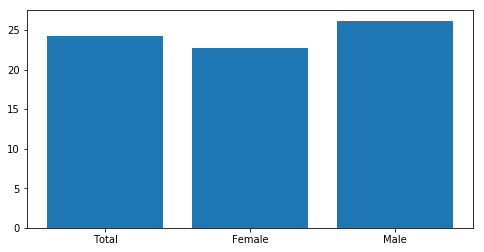

In [22]:
make_plot(train,'Sex',(8,4))

Average of greater_probabilty risk is higher in Males

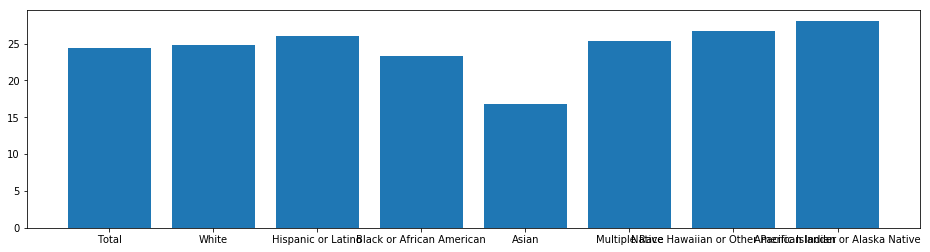

In [23]:
make_plot(train,'Race',(16,4))

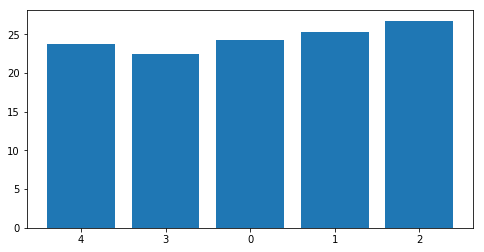

In [24]:
make_plot(train,'Grade',(8,4))

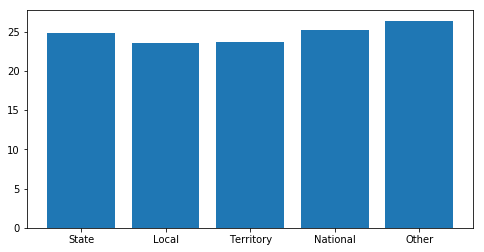

In [25]:
make_plot(train,'StratificationType',(8,4))

Average greater_risk_probabilty is quite uniform for differernt StratificationType

Let's Process ahead with some preprocessing feature selection 

In [26]:
X = train.copy()
X_test = test.copy()

y= X['Greater_Risk_Probability']
X = X.drop(labels = 'Greater_Risk_Probability',axis=1)



In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label = LabelEncoder()
X['LocationDesc'] = label.fit_transform(X['LocationDesc'])
X_test['LocationDesc'] = label.fit_transform(X_test['LocationDesc'])

label = LabelEncoder()
X['Sex'] = label.fit_transform(X['Sex'])
X_test['Sex'] = label.fit_transform(X_test['Sex'])

label = LabelEncoder()
X['Race'] = label.fit_transform(X['Race'])
X_test['Race'] = label.fit_transform(X_test['Race'])

label = LabelEncoder()
X['StratificationType'] = label.fit_transform(X['StratificationType'])
X_test['StratificationType'] = label.fit_transform(X_test['StratificationType'])

label = LabelEncoder()
X['QuestionCode'] = label.fit_transform(X['QuestionCode'])
X_test['QuestionCode'] = label.fit_transform(X_test['QuestionCode'])

X['Sample_Size'] = np.log(X['Sample_Size'])
X_test['Sample_Size'] = np.log(X_test['Sample_Size'])



In [29]:
# drop = ['Patient_ID','Greater_Risk_Question','Description','GeoLocation','QuestionCode']
drop = ['Patient_ID','Greater_Risk_Question','Description','GeoLocation']
X = X.drop(labels = drop,axis=1)
X_test = X_test.drop(labels = drop,axis=1)

In [30]:
from sklearn.feature_selection import f_classif

In [31]:
fval,p_val = f_classif(X,y)

print('F-values for different features')
print(fval)

print('P-values for different features')
print(p_val)

F-values for different features
[1.09096295 1.00254952 2.41381793 1.14841179 1.01921296 0.99207657
 1.00862943 2.00457314 1.12154522 1.05819574 1.03808185 0.99589068]
P-values for different features
[2.24281693e-004 4.61352884e-001 2.83675025e-223 1.49807678e-008
 2.20873107e-001 6.30389967e-001 3.65439823e-001 5.76043832e-147
 2.03172852e-006 1.10704171e-002 6.50727092e-002 5.69712785e-001]


* Let's drop the StratificationType, Race, Grade

In [32]:
X = X.drop(labels = ['StratificationType','Race','Grade'],axis=1)
X_test = X_test.drop(labels = ['StratificationType','Race','Grade'],axis=1)

fval,p_val = f_classif(X,y)

print('F-values for different features')
print(fval)

print('P-values for different features')
print(p_val)

F-values for different features
[1.09096295 1.00254952 2.41381793 1.14841179 1.01921296 2.00457314
 1.12154522 1.05819574 1.03808185]
P-values for different features
[2.24281693e-004 4.61352884e-001 2.83675025e-223 1.49807678e-008
 2.20873107e-001 5.76043832e-147 2.03172852e-006 1.10704171e-002
 6.50727092e-002]


In [33]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [34]:
continuous_cols = ['YEAR','Sample_Size']

categorical_cols = ['LocationDesc','Sex','StratID1','StratID2','StratID3','QuestionCode']

mapper = DataFrameMapper(  
    [([continuous_col], StandardScaler()) for continuous_col in continuous_cols] +
    [([categorical_col], OneHotEncoder()) for categorical_col in categorical_cols])

pipe = Pipeline([('mapper',mapper)])

pipe.fit(X)

Pipeline(memory=None,
     steps=[('mapper', DataFrameMapper(default=False, df_out=False,
        features=[(['YEAR'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Sample_Size'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['LocationDesc'], OneHotEncoder(categorical_features=None, categories=N...andle_unknown='error',
       n_values=None, sparse=True))],
        input_df=False, sparse=False))])

In [35]:
X = pipe.transform(X)
X_test = pipe.transform(X_test)

In [36]:
X.shape

(55399, 132)

In [37]:
y = (y/100).values

Let's create a baseline model and perform a k-fold cross validation on it


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss,mean_squared_error

In [39]:
kf = KFold(n_splits=10,shuffle=True,random_state=42)
cv_scores = []

for train_index, val_index in kf.split(X):
    
    X_train, X_val = X[train_index],X[val_index]
    y_train, y_val = y[train_index],y[val_index]
    
    regressor = LinearRegression(n_jobs=-1)
    regressor.fit(X_train,y_train)

    pred = regressor.predict(X_val)
    mean = mean_squared_error(y_val,pred)
    cv_scores.append(mean)
    print(mean)
print(f"Mean Score {np.mean(cv_scores)}")

0.005178995043475518
0.005273380374826881
0.005296859975279735
0.005041170254239663
0.005154182221739777
0.0051718200851237316
0.005175066216942675
0.005227626360110184
0.005060438252053631
0.005586233926186401
Mean Score 0.00521657727099782


In [40]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [41]:
model = Sequential()
model.add(Dense(256,input_dim=132,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.7))
model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               34048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 50,561
Trainable params: 50,561
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [44]:
checkpoints = ModelCheckpoint('model.h5',monitor='val_mean_squared_error',mode='min',save_best_only='True',verbose=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mean_squared_error', factor=0.1, patience=2, verbose=1, min_lr=0.000001)

In [45]:
epochs = 50
batch_size = 64

In [46]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=[X_val, y_val], callbacks=[checkpoints, reduce_lr])

Instructions for updating:
Use tf.cast instead.
Train on 49860 samples, validate on 5539 samples
Epoch 1/50
49860/49860 [==============================] - 3s 64us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0077 - val_mean_squared_error: 0.0077

Epoch 00001: val_mean_squared_error improved from inf to 0.00772, saving model to model.h5
Epoch 2/50
49860/49860 [==============================] - 2s 41us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0050 - val_mean_squared_error: 0.0050

Epoch 00002: val_mean_squared_error improved from 0.00772 to 0.00502, saving model to model.h5
Epoch 3/50
49860/49860 [==============================] - 2s 41us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0038 - val_mean_squared_error: 0.0038

Epoch 00003: val_mean_squared_error improved from 0.00502 to 0.00380, saving model to model.h5
Epoch 4/50
49860/49860 [==============================] - 2s 41us/step - loss: 0.0069 - mean_squared_error: 0.0069 - v

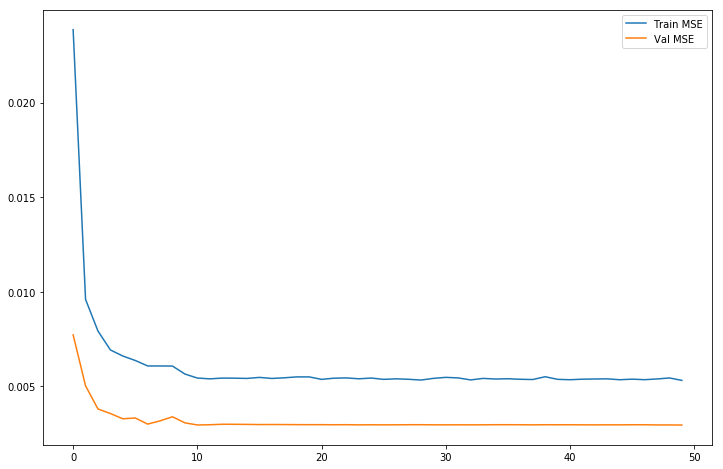

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Test MSE')
plt.legend(('Train MSE', 'Val MSE'))
plt.show()

In [48]:
model.load_weights('model.h5')

In [49]:
pred_test = (model.predict(X_test)*100).round(4)
test['Greater_Risk_Probability'] = pred_test
test.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,55400,2007,Navajo,1,Ever used marijuana,"also called grass, pot, or weed, one or more t...",157.0,Male,Hispanic or Latino,3,NaN,H46,2,4,1,Other,55.156101
1,55401,2001,Florida,1,Currently used marijuana,"also called grass, pot, or weed, one or more t...",724.0,Total,Total,2,"(28.932040377000476, -81.92896053899966)",H48,0,0,4,State,26.370199
2,55402,2005,"Charlotte-Mecklenburg County, NC",1,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,105.0,Male,Hispanic or Latino,4,"(35.227087, -80.843127)",H58,2,4,0,Local,50.312099
3,55403,2017,Nevada,1,Ever used synthetic marijuana,"also called ""K2,"" ""Spice,"" ""fake weed,"" ""King ...",157.0,Male,Total,2,"(39.493240390000494, -117.07184056399967)",H54,2,0,4,State,18.092199
4,55404,2007,Illinois,1,Ever used heroin,"also called ""smack,"" ""junk,"" or ""China White,""...",174.0,Total,Black or African American,1,"(40.48501028300046, -88.99771017799969)",H51,0,3,3,State,6.373900


In [50]:
df_sub = test.loc[:,['Patient_ID','Greater_Risk_Probability']]
df_sub.head()

,Patient_ID,Greater_Risk_Probability
0,55400,55.156101
1,55401,26.370199
2,55402,50.312099
3,55403,18.092199
4,55404,6.373900


In [51]:
df_sub.to_csv(path_or_buf = 'submission.csv',index=False)